# Steady States and Boundary Value Problems 稳态和边值问题

In [1]:
from sympy import *
import numpy as np
import pandas as pd
from manim import *

import matplotlib.pyplot as plt
config.media_width = "100%"
config.verbosity = "WARNING"

Manim Community v0.17.3

## 2.1 The heat equation 热方程

$$
u_t(x,t)=(\kappa(x)u_x(x,t))_x+\psi(x,t)
$$
也称**扩散方程**，*diffusiion equation*

## 2.2 Boundary conditions 边界条件

假设材料介质均匀，方程变为
$$
u_t(x,t)=\kappa u_{xx}(x,t)+\psi(x,t)
$$

## 2.4 A simple finite difference method

$$u''(x)=f(x), 0<x<1 $$
$$ u(0)=\alpha, u(1)=\beta $$
$$
A = \dfrac{1}{h^2}
\begin{bmatrix}
-2 & 1 \\
1 & -2 & 1 \\
& \ddots & \ddots & \ddots \\
&& 1 & -2 & 1 \\
&&& 1 & -2
\end{bmatrix},
F=
\begin{bmatrix}
f(x_1)-\alpha/h^2 \\ f(x_2) \\ \vdots \\ f(x_{m-1}) \\ f(x_m)-\beta/h^2
\end{bmatrix}
$$

## 2.11 Green’s functions and max-norm stability

In [2]:
class GreenFun(Scene):
    def construct(self):
        m = 10
        h = 1/(1+m)
        ax = Axes(x_range=[-1/m, 1+1/m], y_range=[-h, h/2])
        B = []
        B.append(ax.plot(lambda x: 1-x, x_range=(0, 1), color=GREEN_A))
        for j in range(1, m+1):
            x_j = j*h
            curve_1 = ax.plot(lambda x: h*(x_j-1)*x, x_range=(0, x_j), color=GREEN)
            curve_2 = ax.plot(lambda x: h*(x-1)*x_j, x_range=(x_j, 1), color=GREEN)
            curve = curve_1.append_points(curve_2.points)
            B.append(curve)
        B.append(ax.plot(lambda x: x, x_range=(0, 1), color=GREEN_A))

        self.play(Create(ax))
        B_i = iter(B)
        b_1 = next(B_i)
        self.play(FadeIn(b_1))
        last = b_1
        for b in B_i:
            self.play(FadeOut(last), FadeIn(b), run_time=5/m)
            last = b
        self.play(FadeOut(last))
        self.wait()
        

%manim GreenFun

## 2.12 Neumann boundary conditions

$$u''(x)=f(x), 0<x<1 $$
Neumann condition, say,
$$u'(0)=\sigma, u(1)=\beta$$

### First approach

$$
\dfrac{1}{h^2}
\begin{bmatrix}
-h & h  \\
1 & -2 & 1  \\
& 1 & -2 & 1  \\
&& \ddots & \ddots & \ddots \\
&&& 1 & -2 & 1  \\
&&&& 0 & h^2
\end{bmatrix}
\begin{bmatrix}
U_0 \\ U_1 \\ U_2 \\ \vdots \\ U_m \\U_{m+1}
\end{bmatrix}
=
\begin{bmatrix}
\sigma \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_m) \\ \beta
\end{bmatrix}
$$

In [3]:
def A_FA(m: int) -> np.ndarray:
    h = 1/(m+1)
    A = np.diag(-2*np.ones(m+2)) + np.diag(np.ones(m+1), -1) + np.diag(np.ones(m+1), 1)
    A[0, 0], A[0, 1], A[-1, -2], A[-1, -1] = -h, h, 0, h**2
    return A/h**2

A_FA(4)

array([[ -5.,   5.,   0.,   0.,   0.,   0.],
       [ 25., -50.,  25.,   0.,   0.,   0.],
       [  0.,  25., -50.,  25.,   0.,   0.],
       [  0.,   0.,  25., -50.,  25.,   0.],
       [  0.,   0.,   0.,  25., -50.,  25.],
       [  0.,   0.,   0.,   0.,   0.,   1.]])

### Second approach

$$
\dfrac{1}{h^2}
\begin{bmatrix}
-h & h  \\
1 & -2 & 1  \\
& 1 & -2 & 1  \\
&& \ddots & \ddots & \ddots \\
&&& 1 & -2 & 1  \\
&&&& 0 & h^2
\end{bmatrix}
\begin{bmatrix}
U_0 \\ U_1 \\ U_2 \\ \vdots \\ U_m \\U_{m+1}
\end{bmatrix}
=
\begin{bmatrix}
\sigma+\frac{h}{2}f(x_0) \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_m) \\ \beta
\end{bmatrix}
$$

### Third approach

$$
\dfrac{1}{h^2}
\begin{bmatrix}
\frac{3}{2}h & -2h & \frac{1}{2}h  \\
1 & -2 & 1  \\
& 1 & -2 & 1  \\
&& \ddots & \ddots & \ddots \\
&&& 1 & -2 & 1  \\
&&&& 0 & h^2
\end{bmatrix}
\begin{bmatrix}
U_0 \\ U_1 \\ U_2 \\ \vdots \\ U_m \\U_{m+1}
\end{bmatrix}
=
\begin{bmatrix}
\sigma \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_m) \\ \beta
\end{bmatrix}
$$

In [4]:
def A_TA(m: int) -> np.ndarray:
    h = 1/(m+1)
    A = np.diag(-2*np.ones(m+2)) + np.diag(np.ones(m+1), -1) + np.diag(np.ones(m+1), 1)
    A[0, 0], A[0, 1], A[0, 2], A[-1, -2], A[-1, -1] = 1.5*h, -2*h, 0.5*h, 0, h**2
    return A/h**2

A_TA(4)

array([[  7.5, -10. ,   2.5,   0. ,   0. ,   0. ],
       [ 25. , -50. ,  25. ,   0. ,   0. ,   0. ],
       [  0. ,  25. , -50. ,  25. ,   0. ,   0. ],
       [  0. ,   0. ,  25. , -50. ,  25. ,   0. ],
       [  0. ,   0. ,   0. ,  25. , -50. ,  25. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   1. ]])

Figure 2.2 shows the solution to this problem with $f(x)=e^x$, $\sigma=0$, and $\beta=0$ as one example.

In [5]:
def F_1(m:int, sigma=0, beta=0):
    h = 1/(m+1)
    F = np.exp(np.linspace(0, 1, m+2))
    F[0], F[-1] = sigma, beta
    return F

F_1(4)

array([0.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       0.        ])

In [6]:
def F_2(m:int, sigma=0, beta=0):
    h = 1/(m+1)
    F = np.exp(np.linspace(0, 1, m+2))
    F[0], F[-1] = sigma+h/2*F[0], beta
    return F

F_2(4)

array([0.1       , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       0.        ])

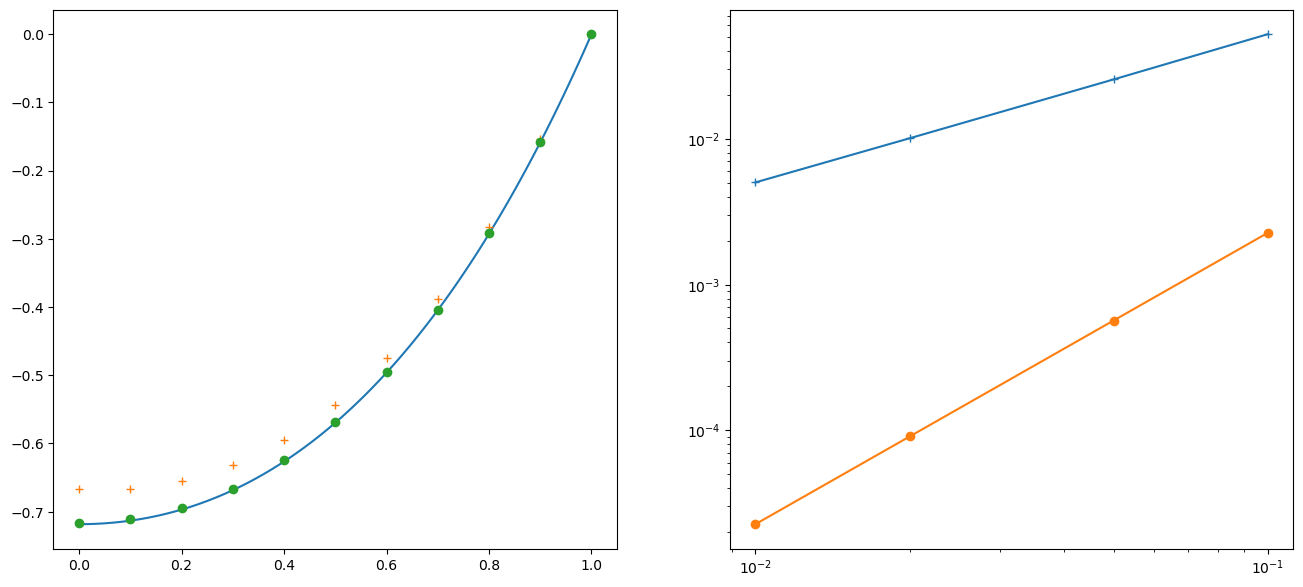

In [7]:
m = 10 - 1
true_solution = lambda x: np.exp(x) - x - np.exp(1) + 1

A = A_FA(m)
f_1 = F_1(m)
f_2 = F_2(m)
res_plus = np.linalg.solve(A, f_1)
res_circle = np.linalg.solve(A, f_2)

x = np.linspace(0, 1, m+2)
x_p = np.linspace(0, 1, 10*(m+2))

plt.figure(figsize=(16, 7))

plt.subplot(121)
plt.plot(x_p, true_solution(x_p))
plt.plot(x, res_plus, '+')
plt.plot(x, res_circle, 'o')

E_1, E_2 = [], []

ms = [10-1, 20-1, 50-1, 100-1]
for m in ms:
    x = np.linspace(0, 1, m+2)
    A = A_FA(m)
    res_plus = np.linalg.solve(A, F_1(m))
    res_circle = np.linalg.solve(A, F_2(m))
    error_1 = np.max(np.abs(res_plus - true_solution(x)))
    error_2 = np.max(np.abs(res_circle - true_solution(x)))
    E_1.append(error_1)
    E_2.append(error_2)

hs = 1/(np.array(ms)+1)

plt.subplot(122)
plt.loglog(hs, np.array(E_1), '-+')
plt.loglog(hs, np.array(E_2), '-o')



## 2.15 A general linear second order equation

$$
a(x)u''(x)+b(x)u'(x) +c(x)u(x)=f(x)
$$

### Example 2.1

$$
(\kappa(x)u'(x))'=f(x)
$$
$$
\kappa(x)u''(x)+\kappa'(x)u'(x)=f(x)
$$

$$
A=\dfrac{1}{h^2}
\begin{bmatrix}
-(k_{1/2}+k_{3/2}) & k_{3/2} \\
k_{3/2}     &   -(k_{3/2}+k_{5/2})  &   k_{5/2} \\
&  \ddots   &   \ddots   &   \ddots \\
& & k_{m-3/2}    &   -(k_{m-3/2}+k_{m-1/2})  &   k_{m-1/2} \\
& & & k_{m-1/2}    &   -(k_{m-1/2}+k_{m+1/2}) \\
\end{bmatrix}
$$
the matrix has the advantage of being symmetric, as we would hope, since the original differential equation is self-adjoint. Moreover, since $\kappa>0$, the matrix can be shown to be nonsingular and negative definite.

$$
h^2x^TAx = -\kappa_{1/2}x_1^2 -\sum_{i=1}^{m-1}-\kappa_{i+1/2}(x_i-x_{i+1})^2 -\kappa_{m+1/2}x_m^2
$$

## 2.16 Nonlinear equations

$$
\theta''(t)=-sin(\theta(t))
$$
$$ \theta(0)=\alpha, \theta(T)=\beta $$

(-2.0, 2.0)

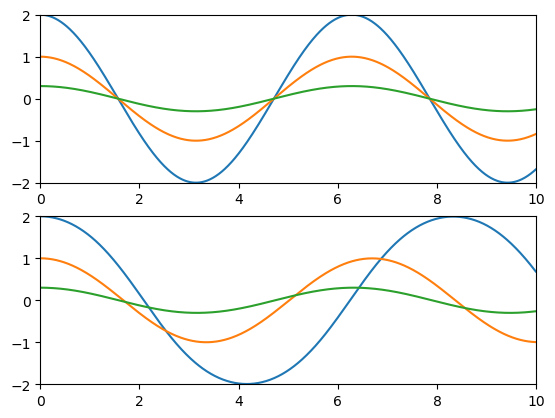

In [8]:
import scipy.integrate as integrate

def ode1(t, y):
    dy = np.array([
        y[1], -y[0]
    ])
    return dy

def ode2(t, y):
    dy = np.array([
        y[1], -np.sin(y[0])
    ])
    return dy

T = 10
Y0 = [[2, 0], [1, 0], [0.3, 0]]
t_eval = np.arange(0, T, 0.01)

plt.subplot(211)
for y0 in Y0:
    solution = integrate.solve_ivp(ode1, (0,T), y0=y0, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0])
plt.xlim([0, T])
plt.ylim([-2, 2])
plt.subplot(212)
for y0 in Y0:
    solution = integrate.solve_ivp(ode2, (0,T), y0=y0, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0])
plt.xlim([0, T])
plt.ylim([-2, 2])


### 2.16.1 Discretization of the nonlinear boundary value problem

$$h=\dfrac{T}{m+1}$$
$$
\dfrac{1}{h^2}(\theta_{i-1}-2\theta_i+\theta_{i+1}+\sin(\theta_i)=0
$$
$$
\dfrac{1}{h^2}
\begin{bmatrix}
-2 & 1 \\
1 & -2 & 1 \\
& \ddots & \ddots & \ddots \\
&& 1 & -2 & 1 \\
&&& 1 & -2
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\ \theta_2 \\ \vdots \\ \theta_{m-1} \\ \theta_m
\end{bmatrix}
+
\begin{bmatrix}
\sin(\theta_1)+\alpha/h^2 \\ \sin(\theta_2) \\ \vdots \\ \sin(\theta_{m-1}) \\ \sin(\theta_m)+\beta/h^2
\end{bmatrix}
=0
$$

In [9]:
def G(m, theta, alpha, beta):
    h = 2*np.pi/(m+1)
    A = np.diag(-2*np.ones(m)) + np.diag(np.ones(m-1), -1) + np.diag(np.ones(m-1), 1)
    A = A/h**2
    res =  A @ theta + np.sin(theta)
    res = np.reshape(res, (-1,))
    res[0] += alpha/h**2
    res[-1] += beta/h**2
    return res

def J(m, theta):
    h = 2*np.pi/(m+1)
    jacobi = np.diag(np.cos(theta))
    A = np.diag(-2*np.ones(m)) + np.diag(np.ones(m-1), -1) + np.diag(np.ones(m-1), 1)
    return jacobi + A/h**2


(-1.1, 1.0)

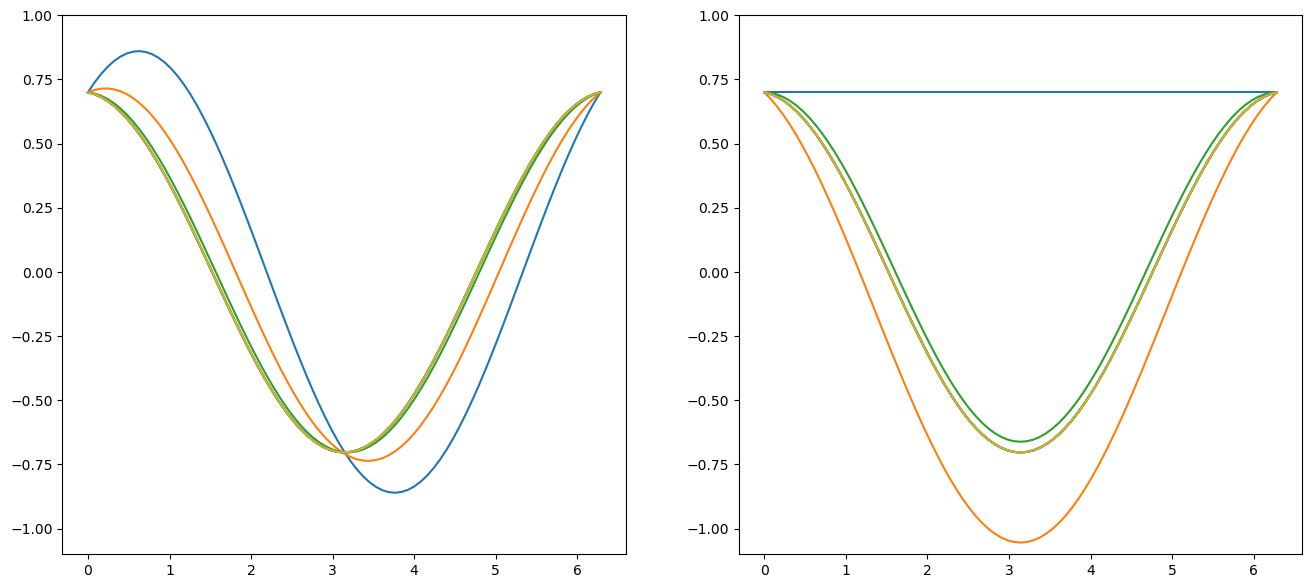

In [10]:
# T=2pi, alpha=beta=0.7

alpha=beta=0.7
m = 80 -1
ti = np.linspace(0, 2*np.pi, m+2)

plt.figure(figsize=(16, 7))
plt.subplot(121)
theta = 0.7*np.cos(ti) + 0.5*np.sin(ti)

plt.plot(ti, theta)

d1= []
for i in range(8):
    delta = np.linalg.solve(J(m, theta[1:-1]), -G(m, theta[1:-1], alpha, beta))
    d1.append(delta)
    theta[1:-1] += delta
    plt.plot(ti, theta)
plt.ylim([-1.1, 1])

plt.subplot(122)
theta = 0.7*np.ones(len(ti))
plt.plot(ti, theta)

for i in range(8):
    delta = np.linalg.solve(J(m, theta[1:-1]), -G(m, theta[1:-1], alpha, beta))
    theta[1:-1] += delta
    plt.plot(ti, theta)
plt.ylim([-1.1, 1])



### 2.16.2 Nonuniqueness

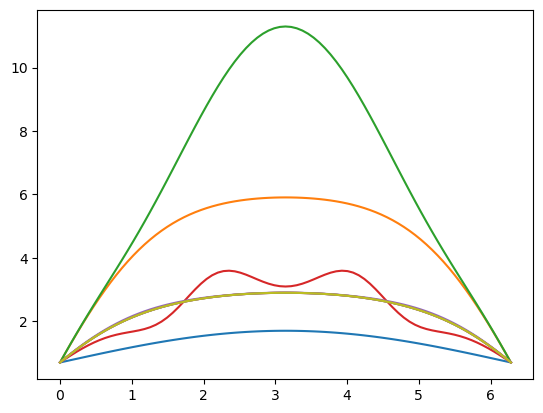

In [13]:
theta = 0.7+np.sin(ti/2)

d2 = []
plt.plot(ti, theta)
for i in range(8):
    delta = np.linalg.solve(J(m, theta[1:-1]), -G(m, theta[1:-1], alpha, beta))
    d2.append(delta)
    theta[1:-1] += delta
    plt.plot(ti, theta)

### 2.16.3 Accuracy on nonlinear equations

In [14]:
import pandas as pd

df = pd.DataFrame()

df['0'], df['1'] = [np.abs(d).max() for d in d1], [np.abs(d).max() for d in d2]
df

,0,1
0,3.284104e-01,4.204661e+00
1,1.751807e-01,5.389902e+00
2,3.104543e-02,8.199350e+00
3,2.373917e-04,7.711050e-01
4,1.528688e-08,3.815357e-02
5,5.536015e-15,2.249020e-04
6,3.199728e-15,9.166734e-09
7,8.029297e-15,9.498860e-16
